# Traffic Signs Recognition using CNN & Keras

##### Our approach to building this traffic sign classification model is discussed in four steps:
[1] Explore the dataset

[2] Build a CNN model

[3] Train and validate the model

[4] Test the model with test dataset

### Step 1: Explore the dataset 

Our ‘train’ folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.

The PIL library is used to open image content into an array.

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
     # Path of each image
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        # Try to load the images
        try:
            image = Image.open(path + '\\'+ a)
            # Resizes the image to 30x30
            image = image.resize((30,30))
            # Turns the image into an array
            image = np.array(image)
            #sim = Image.fromarray(image)
            # Append the image to "data" list
            data.append(image)
            # Append the label to "labels" list
            labels.append(i)
        # If it doesn't work, shows an error message
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Finally, we have stored all the images and their labels into lists (data and labels).

We need to convert the list into numpy arrays for feeding to the model.

The shape of data is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

With the sklearn package, we use the train_test_split() method to split training and testing data.

From the keras.utils package, we use to_categorical method to convert the labels present in y_train and t_test into one-hot encoding.

In [36]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Use "to_categorical" method to convert the labels present in y_train and y_test into one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(78418, 30, 30, 3) (78418,)
(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


### Step 2: Build a CNN model

To classify the images into their respective categories, we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.

The architecture of our model is:

- 2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
- MaxPool2D layer ( pool_size=(2,2))
- Dropout layer (rate=0.25)
- 2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
- MaxPool2D layer ( pool_size=(2,2))
- Dropout layer (rate=0.25)
- Flatten layer to squeeze the layers into 1 dimension
- Dense Fully connected layer (256 nodes, activation=”relu”)
- Dropout layer (rate=0.5)
- Dense layer (43 nodes, activation=”softmax”)

We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.

In [37]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Steps 3: Train and validate the model

After building the model architecture, we then train the model using model.fit(). I tried with batch size 32 and 64. Our model performed better with 64 batch size. And after 15 epochs the accuracy was stable.

In [38]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
1961/1961 [==============================] - 212s 105ms/step - loss: 1.4445 - accuracy: 0.6219 - val_loss: 0.3366 - val_accuracy: 0.9039
Epoch 2/15
1961/1961 [==============================] - 203s 104ms/step - loss: 0.4980 - accuracy: 0.8532 - val_loss: 0.1151 - val_accuracy: 0.9698
Epoch 3/15
1961/1961 [==============================] - 177s 90ms/step - loss: 0.3389 - accuracy: 0.9006 - val_loss: 0.0928 - val_accuracy: 0.9734
Epoch 4/15
1961/1961 [==============================] - 176s 90ms/step - loss: 0.2789 - accuracy: 0.9189 - val_loss: 0.0609 - val_accuracy: 0.9831
Epoch 5/15
1961/1961 [==============================] - 181s 93ms/step - loss: 0.2719 - accuracy: 0.9225 - val_loss: 0.0674 - val_accuracy: 0.9813
Epoch 6/15
1961/1961 [==============================] - 182s 93ms/step - loss: 0.2406 - accuracy: 0.9300 - val_loss: 0.0700 - val_accuracy: 0.9789
Epoch 7/15
1961/1961 [==============================] - 181s 92ms/step - loss: 0.2352 - accuracy: 0.9339 - val_loss:

Our model got a 94% accuracy on the training dataset. With matplotlib, we plot the graph for accuracy and the loss.

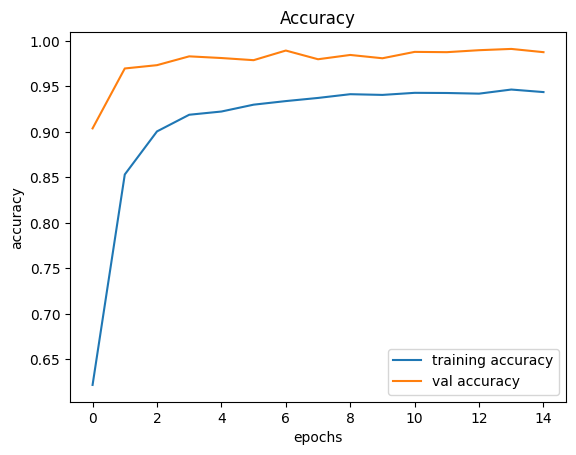

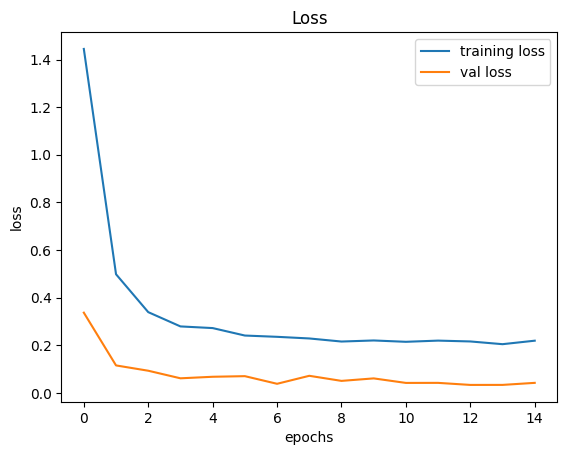

In [40]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Step 4: Test our model with test dataset

Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels. We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data. From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 94% accuracy in this model.

In [41]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# pred = model.predict_classes(X_test) - discontinued -- This function were removed in TensorFlow version 2.6
predict_x=model.predict(X_test) 
pred=np.argmax(predict_x,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


395/395 [==============================] - 5s 12ms/step
0.9459224069675376


In the end, we are going to save the model that we have trained using the Keras model.save() function.

In [77]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


#### Considerations
Approximately 94%. It is a good result, but it can be improved if we use a pre-trained CNN.